In [18]:
import logging

import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Backpropagation algorithm
<font size="3">
Feedforward (inferencia):
$$W · x = y_{pred}$$

Backpropagation algorithm (entrenamiento):
1. Inicializo los pesos ($W$) de manera aleatoria.
2. Obtengo una primera predicción (pobre ya que los pesos son aleatorios). Cuanto de "pobre" lo calcula la función de pérdida:$$loss Fn: \displaystyle\sum_{k=1}^n(y_{pred} - y_{train})^2$$
3. En el entrenamiento, como $x$ (la entrada) e $y_{train}$ (la salida) son fijas, solo se pueden modificar los pesos ($W$) para ajustar la red neuronal.
4. Para ajustar $W$ calculamos el gradiente de la función de pérdida ya que el gradiente describe la direción que tomaria $y_{pred}$ al aumentar cualquiera de los valores de $W$: $$grad(\displaystyle\sum_{k=1}^n(y_{pred} - y_{train})^2)$$
5. Muevo todos los parámetros de $W$ hacia la dirección opuesta del gradiente: $$W =- learningRate * grad·W^T $$
</font>

In [19]:
class NeuralNetwork:
    def __init__(self, input_layer_size, hidden_layer_size, output_layer_size):
        self.input_layer_size = input_layer_size
        self.hidden_layer_size = hidden_layer_size
        self.output_layer_size = output_layer_size
        self.weights_1 = np.random.randn(self.input_layer_size, self.hidden_layer_size)
        self.weights_2 = np.random.randn(self.hidden_layer_size, self.output_layer_size)

    @staticmethod
    def loss_function(result: np.ndarray, expected: np.ndarray):
        return np.mean((result - expected) ** 2)

    @staticmethod
    def sigmoid(x: np.ndarray) -> np.ndarray:
        return 1 / (1 + np.exp(-x))

    @staticmethod
    def sigmoid_derivative(x: np.ndarray) -> np.ndarray:
        return x * (1 - x)

    def feedforward(self, input_data: np.ndarray) -> (np.ndarray, np.ndarray):
        a1 = np.dot(input_data, self.weights_1)
        h1 = self.sigmoid(a1)

        logging.info(f"Input data shape: {input_data.shape}")
        logging.info(f"Weights hidden layer (W1): {self.weights_1.shape}")
        logging.info(f"Activation hidden layer (h1): {h1.shape}")

        a2 = np.dot(h1, self.weights_2)
        probs = self.sigmoid(a2)

        logging.info(f"Weights output layer (W2): {self.weights_2.shape}")
        logging.info(f"Probabilities: {probs.shape}")

        return probs, h1

    def backpropagation(self, x_train: np.ndarray, y_train: np.ndarray, learning_rate):
        # Perform forward pass and get predictions and hidden layer activations
        probs, h1 = self.feedforward(input_data=x_train)

        # Compute output layer error and delta
        output_error = probs - y_train
        delta_output_layer = output_error * self.sigmoid_derivative(probs)

        logging.info(f"Train label: {y_train.shape}")
        logging.info(f"Predicted probabilities: {probs.shape}")
        logging.info(f"Error shape: {output_error.shape}")
        logging.info(f"Error: {output_error}")
        logging.info(f"Delta output layer shape: {delta_output_layer.shape}")

        # Compute hidden layer error and delta
        hidden_error = np.dot(delta_output_layer, self.weights_2.T)
        delta_hidden_layer = hidden_error * self.sigmoid_derivative(h1)

        logging.info(f"Hidden error shape: {hidden_error.shape}")
        logging.info(f"Hidden derivative shape: {delta_hidden_layer.shape}")

        # Update weights
        self.weights_2 += -learning_rate * np.dot(h1.T, delta_output_layer)
        self.weights_1 += -learning_rate * np.dot(x_train.T, delta_hidden_layer)

        return self.loss_function(probs, y_train)

    def train(self, x_train: np.ndarray, y_train: np.ndarray, epochs, learning_rate, print_every: int = 100):
        for epoch in range(epochs):
            loss = self.backpropagation(x_train, y_train, learning_rate=learning_rate)
            if (epoch + 1) % print_every == 0:
                print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss}")

    def predict(self, x_test):
        predictions, _ = self.feedforward(x_test)
        return predictions

In [21]:
def encode_digit(digit: int) -> np.ndarray:
    one_hot = np.zeros((10,))
    one_hot[digit] = 1
    return one_hot

def encode_labels(labels_array: np.ndarray) -> np.ndarray:
    encoded = [encode_digit(label) for label in labels_array]
    return np.array(encoded)

### TRAINING

In [24]:
digits = datasets.load_digits()
training_data = digits.data # Images 8x8pixels -> 64 | 1797 examples -> ndarray (1797, 64)
label_data = digits.target # Labels -> ndarray (1797, 1)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(training_data, label_data, test_size=0.2, random_state=9)

In [26]:
nn = NeuralNetwork(input_layer_size=64, hidden_layer_size=64, output_layer_size=10)

In [27]:
y_train = encode_labels(labels_array=y_train)

In [28]:
nn.train(x_train, y_train, epochs=100000, learning_rate=0.0001, print_every=1000)

Epoch 1000/100000, Loss: 0.05643195875216917
Epoch 2000/100000, Loss: 0.04016087728621255
Epoch 3000/100000, Loss: 0.03185726607378321
Epoch 4000/100000, Loss: 0.024672362054829613
Epoch 5000/100000, Loss: 0.019525144491253234
Epoch 6000/100000, Loss: 0.01498641402646416
Epoch 7000/100000, Loss: 0.011834645988089304
Epoch 8000/100000, Loss: 0.010157265815163567
Epoch 9000/100000, Loss: 0.00906813437585144
Epoch 10000/100000, Loss: 0.008175835323130373
Epoch 11000/100000, Loss: 0.007458015297302915
Epoch 12000/100000, Loss: 0.006874398660183108
Epoch 13000/100000, Loss: 0.006397111947987763
Epoch 14000/100000, Loss: 0.006012865481931715
Epoch 15000/100000, Loss: 0.005696524922762519
Epoch 16000/100000, Loss: 0.0053682094575108795
Epoch 17000/100000, Loss: 0.004918978401308121
Epoch 18000/100000, Loss: 0.004618047573477933
Epoch 19000/100000, Loss: 0.004385345679886389
Epoch 20000/100000, Loss: 0.004206348325943985
Epoch 21000/100000, Loss: 0.004047587591570223
Epoch 22000/100000, Loss: 

## Inference

In [47]:
probs = nn.predict(x_test[1])

In [49]:
x_test[1]


array([ 0.,  0.,  2., 16., 10.,  0.,  0.,  0.,  0.,  0.,  3., 16., 16.,
        1.,  0.,  0.,  0.,  0.,  5., 16., 14.,  0.,  0.,  0.,  0.,  0.,
        3., 16., 13.,  0.,  0.,  0.,  0.,  0.,  1., 16., 15.,  0.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  0.,  0.,  0.,  0.,  0.,  2., 16.,
       15.,  2.,  0.,  0.,  0.,  0.,  0., 15., 16., 11.,  0.,  0.])

In [48]:
probs

array([9.67972723e-08, 9.89390290e-01, 1.13926381e-02, 7.77410380e-03,
       2.07566777e-04, 4.63862427e-05, 2.93563582e-04, 4.16311842e-05,
       1.26917194e-05, 6.11012076e-08])

In [45]:
y_test[5]

np.int64(0)

<Figure size 300x300 with 0 Axes>

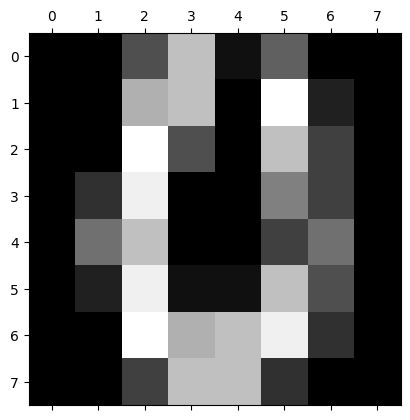

In [46]:
plt.figure(1, figsize=(3, 3))
plt.matshow(x_test[5].reshape(8,8), cmap='grey')
plt.show()